# Imports and settings


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [224]:
# plotting settings
# ensure all plots have white backgrounds and no transparent axes
plt.rcParams['axes.facecolor'] = 'white'


plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.linewidth'] = 3
plt.rcParams['axes.titlesize'] = 19
plt.rcParams['axes.labelpad'] = 15
plt.rcParams['xtick.labelsize'] = 19
plt.rcParams['ytick.labelsize'] = 19
plt.rcParams['legend.fontsize'] = 25
plt.rcParams['figure.titlesize'] = 19
plt.rcParams['figure.figsize'] = (8,8)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['errorbar.capsize'] = 3.0

# Useful functions

In [166]:
np.random.seed(42)

In [167]:
def random_walk(num_steps):
    """Generate a random walk of num_steps steps."""
    steps = np.random.choice([-1, 1], size=num_steps)
    return np.cumsum(steps)

In [168]:
def cumulative_probability_of_discovery(num_walks, walk_length, target):
    """Calculate the cumulative probability of discovering the target state."""
    discovery_counts = np.zeros(walk_length)
    
    for _ in range(num_walks):
        walk = random_walk(walk_length)
        for i in range(walk_length):
            if target in walk[:i+1]:
                discovery_counts[i] += 1
    
    return discovery_counts / num_walks

In [169]:
def bootstrap_confidence_interval(data, num_bootstrap=1000, confidence_level=0.95):
    """Compute the bootstrap confidence interval for the data."""
    means = []
    n = len(data)
    for _ in range(num_bootstrap):
        sample = np.random.choice(data, n, replace=True)
        means.append(np.mean(sample))
    lower_bound = np.percentile(means, (1 - confidence_level) / 2 * 100)
    upper_bound = np.percentile(means, (1 + confidence_level) / 2 * 100)
    return lower_bound, upper_bound

In [170]:
def cumulative_probability_single_long_walk(total_length, target):
    """Calculate the cumulative probability of discovering the target state for a single long walk."""
    walk = random_walk(total_length)
    discovery_counts = np.zeros(total_length)
    
    for i in range(total_length):
        if target in walk[:i+1]:
            discovery_counts[i] = 1
    
    return np.cumsum(discovery_counts) / np.arange(1, total_length+1)

In [294]:
# Parameters
num_walks = 100
walk_length = 2000
total_length = num_walks * walk_length
target = 47  # Set a target state farther from the starting point

In [297]:
# Simulate parallel random walks
parallel_prob_cumulative = cumulative_probability_of_discovery(num_walks, walk_length, 4)

In [293]:
# Simulate single long random walk
single_prob_cumulative = cumulative_probability_single_long_walk(total_length, target)

In [261]:
# Normalize the time axis
normalized_time_parallel = np.linspace(0, 1, walk_length)
normalized_time_single = np.linspace(0, 1, total_length)

In [332]:
# save x and y values 
# comment these out to preserve the files
# np.save('prob-discovery-steps-parallel.npy', normalized_time_parallel * total_length)
# np.save('prob-discovery-parallel.npy', parallel_prob_cumulative)
# np.save('error-prob-discovery-parallel.npy', bootstrap_confidence_interval(parallel_prob_cumulative))
# np.save('prob-discovery-steps-single.npy', normalized_time_single * total_length)
# np.save('prob-discovery-single.npy', single_prob_cumulative)

In [333]:
probs_discovery_steps_parallel = np.load('prob-discovery-steps-parallel.npy')
probs_discovery_parallel = np.load('prob-discovery-parallel.npy')
err_probs_discovery_parallel = np.load('error-prob-discovery-parallel.npy')
probs_discovery_steps_single = np.load('prob-discovery-steps-single.npy')
probs_discovery_single = np.load('prob-discovery-single.npy')

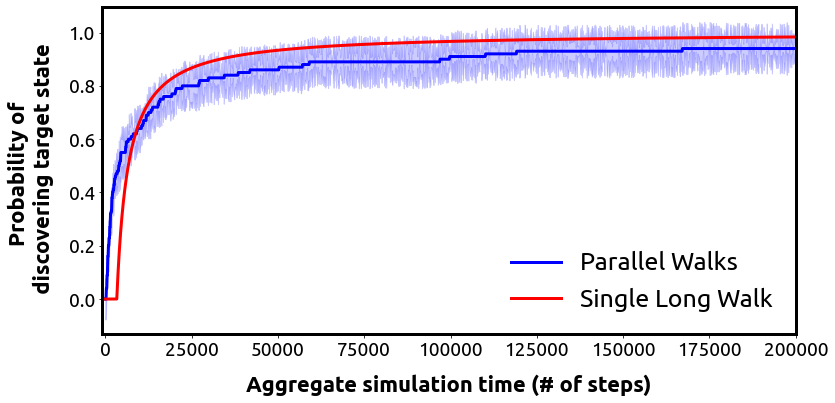

In [363]:
# Plot the cumulative probabilities
plt.figure(figsize=(12, 6))
plt.plot(probs_discovery_steps_parallel, probs_discovery_parallel, 
         label='Parallel Walks', color='b')
plt.fill_between(probs_discovery_steps_parallel, 
                 probs_discovery_parallel-err_probs_discovery_parallel,
                 probs_discovery_parallel+err_probs_discovery_parallel, 
                 color='b', alpha=0.2)
plt.plot(probs_discovery_steps_single, 
         probs_discovery_single, label='Single Long Walk', color='r')
plt.xlabel('Aggregate simulation time (# of steps)')
plt.ylabel('Probability of \n discovering target state')
plt.legend(frameon=False, loc='lower right')
plt.xlim(-1000, total_length)
plt.xscale('linear')
plt.tight_layout()
plt.savefig('figures/discovery-probability-walks.png', dpi=300)

In [219]:
import numpy as np
import matplotlib.pyplot as plt
import time

np.random.seed(42)  # For reproducibility

def random_walk(num_steps):
    """Generate a random walk of num_steps steps."""
    steps = np.random.choice([-1, 1], size=num_steps)
    return np.cumsum(steps)

def parallel_random_walks(num_walks, walk_length, target):
    """Simulate multiple parallel random walks."""
    discovery_counts = np.zeros(walk_length)
    
    for _ in range(num_walks):
        walk = random_walk(walk_length)
        for i in range(walk_length):
            if target in walk[:i+1]:
                discovery_counts[i] += 1

    return discovery_counts / num_walks

def single_long_random_walk(total_length, target):
    """Simulate a single long random walk."""
    walk = random_walk(total_length)
    discovery_counts = np.zeros(total_length)
    
    for i in range(total_length):
        if target in walk[:i+1]:
            discovery_counts[i] = 1
    
    return np.cumsum(discovery_counts) / np.arange(1, total_length+1)

# Parameters for simulation
num_walks_list = [10, 20, 50, 100, 250, 500, 750, 1000]  # Different numbers of parallel walks
walk_length = 2000  # Length of each parallel walk
target = 46  # Target state for discovery
execution_times_parallel = []
execution_times_single = []

# Measure execution time for different total simulation times
for num_walks in num_walks_list:
    total_length = num_walks * walk_length

    # Measure time for parallel random walks
    start_time = time.time()
    parallel_random_walks(num_walks, walk_length, 5)
    execution_time_parallel = time.time() - start_time

    # Measure time for a single long random walk
    start_time = time.time()
    single_long_random_walk(total_length, target)
    execution_time_single = time.time() - start_time

    execution_times_parallel.append(execution_time_parallel)
    execution_times_single.append(execution_time_single)

# # Plotting the execution times
# normalized_time_parallel = np.linspace(0, 1, walk_length)
# normalized_time_single = np.linspace(0, 1, total_length)

# plt.figure(figsize=(12, 6))
# plt.plot(num_walks_list, execution_times_parallel, label='Parallel Walks', color='b', marker='o')
# plt.plot(num_walks_list, execution_times_single, label='Single Long Walk', color='r', marker='o')
# plt.xlabel('Total aggregate simulation time (# of steps)')
# plt.ylabel('Execution Time (seconds)')
# plt.legend()

KeyboardInterrupt: 

In [253]:
# Write out the x and y values that will be plotted into .npy files and are zipped
# Zip together np.array(num_walks_list[:-1])*walk_length and execution_times_parallel and write to disk as .npy files
# Zip together np.array(num_walks_list[:-1])*walk_length and execution_times_single and write to disk as .npy files
np.save('num_steps_parallel.npy', np.array(num_walks_list[:-1])*walk_length)
np.save('execution_times_parallel.npy', execution_times_parallel)
np.save('num_steps_single.npy', np.array(num_walks_list[:-1])*walk_length)
np.save('execution_times_single.npy', execution_times_single)

In [257]:
parallel_x_vals = np.load('num_steps_parallel.npy')
parallel_y_vals = np.load('execution_times_parallel.npy')
single_x_vals = np.load('num_steps_single.npy')
single_y_vals = np.load('execution_times_single.npy')

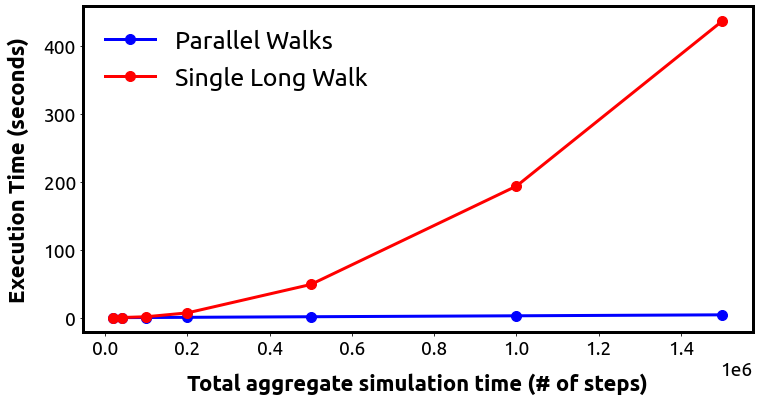

In [364]:
# Plotting the execution times
plt.figure(figsize=(12, 6))
plt.plot(parallel_x_vals, parallel_y_vals, 
         label='Parallel Walks', color='b', marker='o', markersize=10)
plt.plot(single_x_vals, single_y_vals, 
         label='Single Long Walk', color='r', marker='o', markersize=10)
plt.xlabel('Total aggregate simulation time (# of steps)')
plt.ylabel('Wall Time (seconds)')
plt.xscale('linear')
plt.legend(frameon=False)
plt.savefig('figures/execution-time-walks.png', dpi=300)